## 1 Import libraries

In [1]:
from rbm import RBM
from autoencoder_rbm import Autoencoder_RBM
from dbn import DeepBeliefNetwork
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 2 MNIST

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

# Download the data in the working directory
mnist = input_data.read_data_sets("../data/mnist/", one_hot=True)

#training_data = {image: mnist.train.images, label: mnist.train.labels}
#validation_data = {image: mnist.validation.images, label: mnist.validation.labels}
#test_data = {image: mnist.test.images, label: mnist.test.labels}
train_dataset = mnist.train.images
train_labels = mnist.train.labels
validation_dataset = mnist.validation.images
validation_labels = mnist.validation.labels
test_dataset = mnist.test.images
test_labels = mnist.test.labels
print("The shape of the dataset for training: ", train_dataset.shape, train_labels.shape)
print("The shape of the dataset for validation: ", validation_dataset.shape, validation_labels.shape)
print("The shape of the dataset for test: ", test_dataset.shape, test_labels.shape)

Extracting ../data/mnist/train-images-idx3-ubyte.gz
Extracting ../data/mnist/train-labels-idx1-ubyte.gz
Extracting ../data/mnist/t10k-images-idx3-ubyte.gz
Extracting ../data/mnist/t10k-labels-idx1-ubyte.gz
The shape of the dataset for training:  (55000, 784) (55000, 10)
The shape of the dataset for validation:  (5000, 784) (5000, 10)
The shape of the dataset for test:  (10000, 784) (10000, 10)


In [3]:
print(np.argmax(train_labels[:21], axis=1))

[7 3 4 6 1 8 1 0 9 8 0 3 1 2 7 0 2 9 6 0 1]


In [4]:
train_set = pd.DataFrame(train_dataset)
labels_tmp = pd.DataFrame(train_labels[:10])
train_set.loc[:10, :10].loc[np.argmax(train_labels[:10],axis=1)==1,:10]

,0,1,2,3,4,5,6,7,8,9,10
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
train_set_1 = train_set.loc[np.argmax(train_labels, axis=1)==1, :]
train_labels_1 = train_labels[list(train_set_1.index.values)]
print(train_set_1.shape)
print(train_labels_1[:10])
train_set_1.head()

(6179, 784)
[[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
train_set_7 = train_set.loc[np.argmax(train_labels, axis=1)==7, :]
print(train_set_7.shape)
train_set_7.head()

(5715, 784)


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2.0 Mix 1 and 7

In [7]:
# Choose 20 images of 7
num_abonormal = 20
batch_images_7 = train_set_7.sample(num_abonormal)
batch_labels_7 = train_labels[list(batch_images_7.index.values)]
print(batch_images_7.shape)
print(batch_labels_7)

(20, 784)
[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]]


In [8]:
train_set_mix = pd.concat([train_set_1, batch_images_7], ignore_index=True, axis=0)
train_labels_mix = pd.concat([pd.DataFrame(train_labels_1), pd.DataFrame(batch_labels_7)], ignore_index=True, axis=0)

In [10]:
print(train_labels_mix.tail())

        0    1    2    3    4    5    6    7    8    9
6194  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
6195  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
6196  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
6197  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
6198  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0


In [11]:
# Shuffle train_set_mix and train_labels_mix in the same way
train_set_mix_total = pd.concat([train_set_mix, train_labels_mix], axis=1)
train_set_mix_total = train_set_mix_total.sample(frac=1).reset_index(drop=True)
print(train_set_mix_total.shape)

(6199, 794)


In [12]:
train_set_shuffle = train_set_mix_total.iloc[:, 0:batch_images_7.shape[1]]
train_labels_shuffle = train_set_mix_total.iloc[:, batch_images_7.shape[1]:]
print(train_set_shuffle.shape)
print(train_labels_shuffle.shape)

(6199, 784)
(6199, 10)


In [19]:
index_abnormal = train_labels_shuffle.index[np.argmax(np.array(train_labels_shuffle), axis=1)==7]
train_labels_shuffle[np.argmax(np.array(train_labels_shuffle), axis=1)==7]

,0,1,2,3,4,5,6,7,8,9
44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


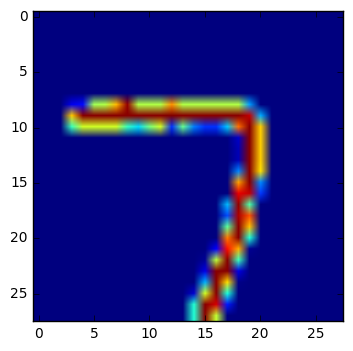

In [14]:
plt.figure()
plt.imshow(train_set_shuffle.iloc[44, :].reshape(28, 28))
plt.show()

In [18]:
def recons_error(input_set, recons):
    dif = input_set - recons
    dif = np.power(dif, 2)
    return np.mean(dif, axis=1)

In [15]:
# Test for autoencoder
autoencoder_1 = Autoencoder_RBM(
       rbm_layers=[1000, 500, 100],
       rbm_gauss_visible=True,
       finetune_num_epochs=150,
       finetune_loss_func='mse',
       do_pretrain=False,
       tied_weights=False)
compression_1, reconstruction_1, loss_summary_1 = autoencoder_1.fit(
    np.array(train_set_shuffle), validation_set=np.array(train_set_shuffle), test_set=np.array(train_set_shuffle))

Iter 1: Training set: current loss 0.168742  ||  Validation set: current loss 0.168742
Validation:  [5847 4926  710 5976 2005 3786 1647 1845 2854 3474 2431 6075 4525 2423 4201
 3560 2724 5044 5293 6096  459 2413 1131  984 4541]
Iter 2: Training set: current loss 0.168825  ||  Validation set: current loss 0.168826
Validation:  [5847 4926  710 5976 3786 2005 1647 2854 3474 1845 2431 6075 4525 2423 4201
 3560 2724 5293 5044 6096  459 2413 1131 1133  984]
Iter 3: Training set: current loss 0.168698  ||  Validation set: current loss 0.168691
Validation:  [5847 4926  710 5976 2005 3786 1647 2854 1845 2431 3474 6075 2423 4525 4201
 2724 3560 5044 6096 5293 2413  459 1131  984 4541]
Iter 4: Training set: current loss 0.168766  ||  Validation set: current loss 0.168755
Validation:  [5847 4926  710 5976 2005 3786 1647 1845 3474 2431 2854 6075 4525 2423 4201
 3560 2724 5044 5293  459 6096 2413 1133 4541  984]
Iter 5: Training set: current loss 0.168649  ||  Validation set: current loss 0.168642
V

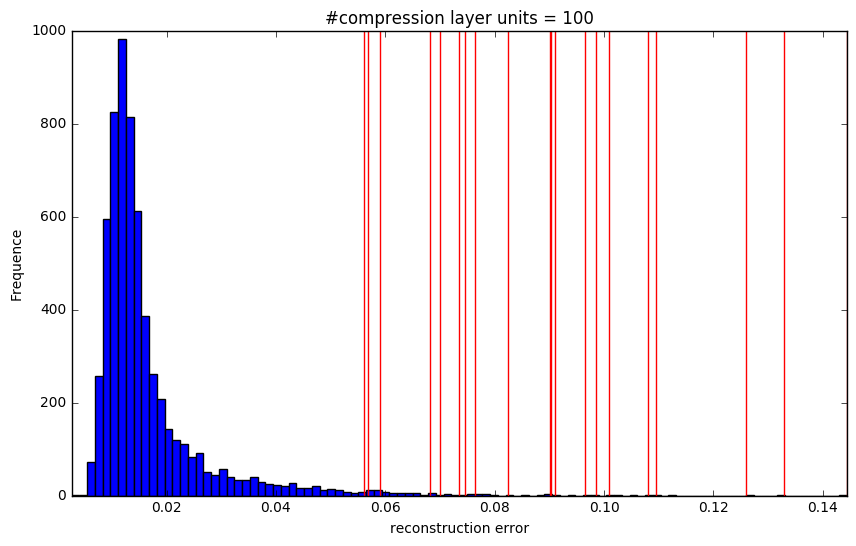

In [23]:
reconstruction_error_1 = recons_error(np.array(train_set_shuffle), reconstruction_1)
plt.figure(figsize=(10, 6))
min_bound = np.min(reconstruction_error_1) / 2.0
max_bound = np.max(reconstruction_error_1)
plot_range = max_bound - min_bound
num_bins = 100
bins = [ (min_bound + i * plot_range / num_bins) for i in range(num_bins+1)]
freq, _, _ = plt.hist(reconstruction_error_1, bins=bins)

ax = plt.axes()
for item in index_abnormal:
    ax.axvline(reconstruction_error_1[item], color='r', linestyle='-')

ax.set_xlim([min_bound, max_bound])
plt.xlabel(r'reconstruction error')
plt.ylabel(r'Frequence')
plt.title('#compression layer units = 100')
plt.savefig('mnist_compare_100units.png')
plt.show()

In [16]:
# Test for autoencoder
autoencoder_2 = Autoencoder_RBM(
       rbm_layers=[1000, 500, 10],
       rbm_gauss_visible=True,
       finetune_num_epochs=150,
       finetune_loss_func='mse',
       do_pretrain=False,
       tied_weights=False)
compression_2, reconstruction_2, loss_summary_2 = autoencoder_2.fit(
    np.array(train_set_shuffle), validation_set=np.array(train_set_shuffle), test_set=np.array(train_set_shuffle))

Iter 1: Training set: current loss 0.169939  ||  Validation set: current loss 0.169927
Validation:  [5847 4926  710 5976 2005 3786 1647 2431 1845 3474 2854 6075 2423 4525 2724
 4201 5044 3560 5293 6096  459 2413  984 4541 1131]
Iter 2: Training set: current loss 0.169926  ||  Validation set: current loss 0.169932
Validation:  [5847 4926  710 5976 2005 1647 2854 3786 2431 1845 3474 6075 2423 4525 6096
 2724 4201 5044 3560 2413 1131 5293  459  984 3207]
Iter 3: Training set: current loss 0.169971  ||  Validation set: current loss 0.169989
Validation:  [5847 4926  710 5976 3786 2005 1647 3474 2431 1845 2854 6075 4525 2423 4201
 2724 3560 5044 5293  459 6096 2413 1133 4541  984]
Iter 4: Training set: current loss 0.169925  ||  Validation set: current loss 0.169918
Validation:  [5847 4926  710 5976 2005 3786 1647 2854 1845 2431 3474 6075 2423 4525 4201
 5044 2724 6096 3560 2413 1131 5293  459  984 3207]
Iter 5: Training set: current loss 0.169865  ||  Validation set: current loss 0.169879
V

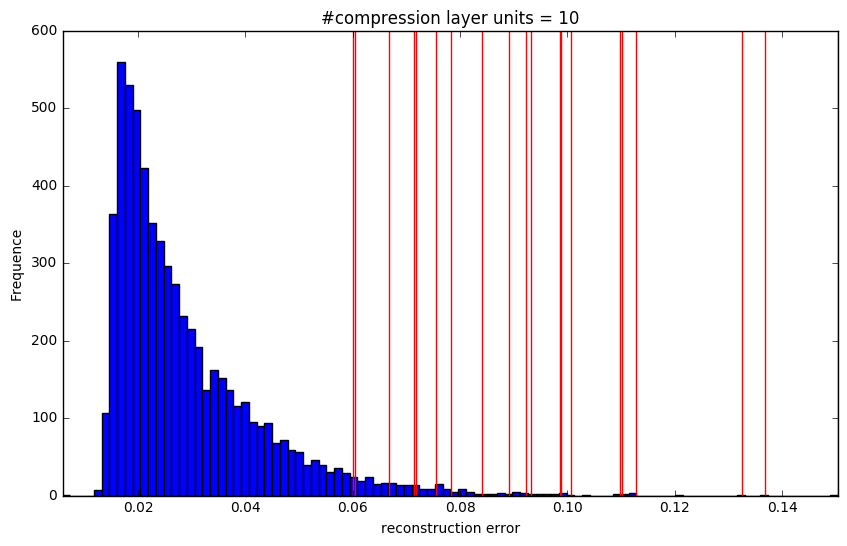

In [24]:
reconstruction_error_2 = recons_error(np.array(train_set_shuffle), reconstruction_2)
plt.figure(figsize=(10, 6))
min_bound = np.min(reconstruction_error_2) / 2.0
max_bound = np.max(reconstruction_error_2)
plot_range = max_bound - min_bound
num_bins = 100
bins = [ (min_bound + i * plot_range / num_bins) for i in range(num_bins+1)]
freq, _, _ = plt.hist(reconstruction_error_2, bins=bins)

ax = plt.axes()
for item in index_abnormal:
    ax.axvline(reconstruction_error_2[item], color='r', linestyle='-')

ax.set_xlim([min_bound, max_bound])
plt.xlabel(r'reconstruction error')
plt.ylabel(r'Frequence')
plt.title('#compression layer units = 10')
plt.savefig('mnist_compare_10units.png')
plt.show()

In [17]:
# Test for autoencoder
autoencoder_3 = Autoencoder_RBM(
       rbm_layers=[1000, 500, 4],
       rbm_gauss_visible=True,
       finetune_num_epochs=150,
       finetune_loss_func='mse',
       do_pretrain=False,
       tied_weights=False)
compression_3, reconstruction_3, loss_summary_3 = autoencoder_3.fit(
    np.array(train_set_shuffle), validation_set=np.array(train_set_shuffle), test_set=np.array(train_set_shuffle))

Iter 1: Training set: current loss 0.170086  ||  Validation set: current loss 0.170057
Validation:  [5847 4926  710 5976 2005 3786 1647 1845 2431 3474 2854 6075 4525 2423 4201
 3560 2724 5293 5044  459 6096  984 4541 1133 2413]
Iter 2: Training set: current loss 0.169954  ||  Validation set: current loss 0.169967
Validation:  [5847 4926  710 5976 2005 3786 1647 2431 1845 3474 2854 6075 4525 2423 4201
 2724 3560 5044 5293 6096  459 2413 1131  984 4541]
Iter 3: Training set: current loss 0.170009  ||  Validation set: current loss 0.170025
Validation:  [5847 4926  710 5976 3786 2005 1647 2431 3474 1845 2854 6075 4525 2423 2724
 4201 3560 5044 5293  459 6096 2413 1133  984 4541]
Iter 4: Training set: current loss 0.170020  ||  Validation set: current loss 0.170022
Validation:  [5847 4926  710 5976 3786 2005 2854 1647 2431 1845 3474 6075 2423 4525 6096
 2724 4201 5044 2413 3560 1131 5293  459 3207  984]
Iter 5: Training set: current loss 0.170016  ||  Validation set: current loss 0.170009
V

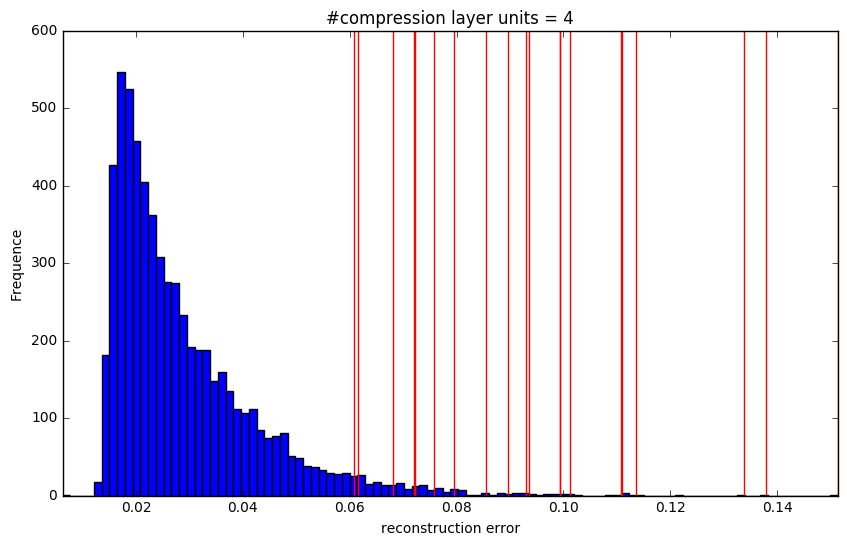

In [25]:
reconstruction_error_3 = recons_error(np.array(train_set_shuffle), reconstruction_3)
plt.figure(figsize=(10, 6))
min_bound = np.min(reconstruction_error_3) / 2.0
max_bound = np.max(reconstruction_error_3)
plot_range = max_bound - min_bound
num_bins = 100
bins = [ (min_bound + i * plot_range / num_bins) for i in range(num_bins+1)]
freq, _, _ = plt.hist(reconstruction_error_3, bins=bins)

ax = plt.axes()
for item in index_abnormal:
    ax.axvline(reconstruction_error_3[item], color='r', linestyle='-')

ax.set_xlim([min_bound, max_bound])
plt.xlabel(r'reconstruction error')
plt.ylabel(r'Frequence')
plt.title('#compression layer units = 4')
plt.savefig('mnist_compare_4units.png')
plt.show()

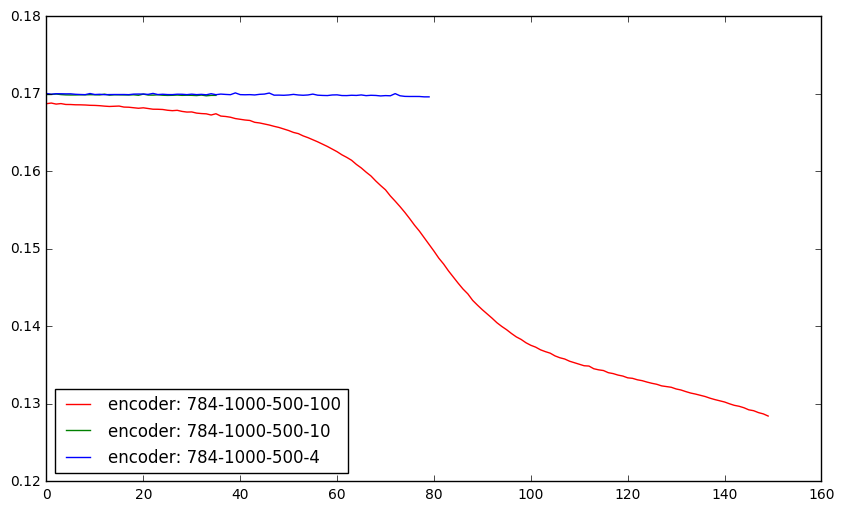

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(loss_summary_1, 'r-', label='encoder: 784-1000-500-100')
plt.plot(loss_summary_2, 'g-', label='encoder: 784-1000-500-10')
plt.plot(loss_summary_3, 'b-', label='encoder: 784-1000-500-4')
plt.legend(loc='lower left')
plt.show()

In [30]:
top_25 = [5847, 4926,  710, 5976, 2005, 1647, 1845, 3786, 3474, 2431, 2423, 4201, 6075, 5044, 2724,
 4541,  984, 3560, 1091, 4525, 1049,   44, 3911, 4850, 2854,]

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


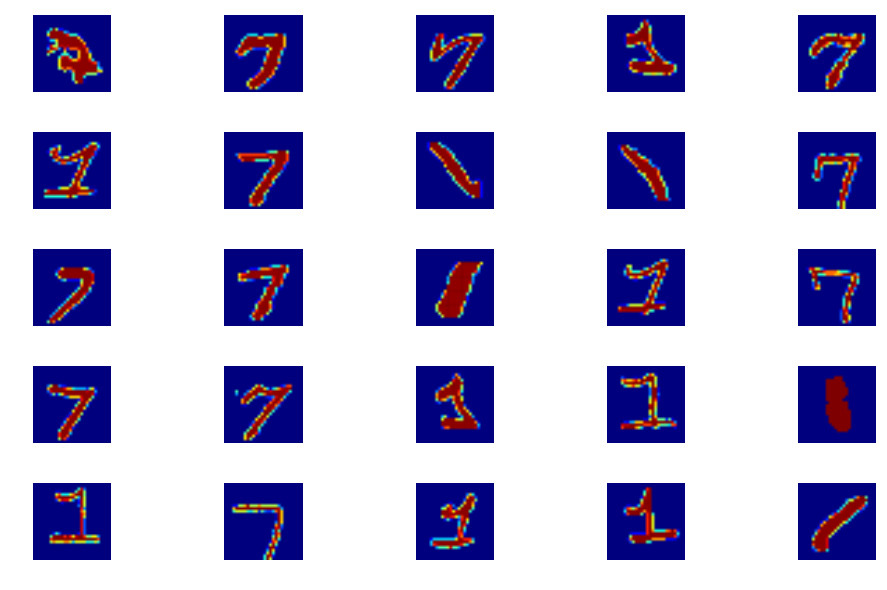

In [32]:
plt.figure(figsize=(10, 6))
n_rows = 5
n_cols = 5

for i in range(n_rows * n_cols):
    plt.subplot(n_rows, n_cols, i+1)
    #plt.imshow(train_set_shuffle.loc[final_25[i]].reshape(28, 28),
     #          interpolation="none", cmap="gray_r")
    plt.imshow(train_set_shuffle.loc[top_25[i]].reshape(28, 28))
    plt.axis("off")
plt.tight_layout()
plt.savefig('top_25.png')
plt.show()

In [69]:
number = 2
train_set_shuffle.to_csv(('experiments/train_set_shuffle_'+str(number)+'.csv'))
train_labels_shuffle.to_csv(('/experiments/train_labels_shuffle_1'+str(number)+'.csv'))
pd.DataFrame(reconstruction).to_csv('/experiments/reconstruction_1'+str(number)+'.csv'))
pd.DataFrame(compression).to_csv('/experiments/compression_1'+str(number)+'.csv'))

### 2.1 RBM

In [ ]:
# Test for RBM
rbm_model = RBM(visible_unit_type='gauss', batch_size=100, n_epochs=3, learning_rate=0.01)
rbm_model.fit(train_dataset, validation_set = validation_dataset)
rbm_model.get_parameters(tf.Graph())
print(rbm_model.trained_params)

### 2.2 DBN

##### 2.1 DBN without pretrain

In [59]:
dbn_model = DeepBeliefNetwork(
        name='dbn',
        rbm_layers=[20, 20],
        rbm_gauss_visible=True,
        finetune_num_epochs=30,
        do_pretrain=False)
dbn_model.fit(train_dataset, train_labels, validation_dataset, validation_labels)

Iter 1:    Training: current loss 2.302641 | current accuracy 0.112345    ||    Validation: current loss 2.301809 | current accuracy 0.112600
Iter 2:    Training: current loss 2.302948 | current accuracy 0.112345    ||    Validation: current loss 2.302728 | current accuracy 0.112600
Iter 3:    Training: current loss 2.302518 | current accuracy 0.112345    ||    Validation: current loss 2.301333 | current accuracy 0.112600
Iter 4:    Training: current loss 2.302155 | current accuracy 0.112345    ||    Validation: current loss 2.301389 | current accuracy 0.112600
Iter 5:    Training: current loss 2.302402 | current accuracy 0.112345    ||    Validation: current loss 2.301998 | current accuracy 0.112600
Iter 6:    Training: current loss 2.302248 | current accuracy 0.099455    ||    Validation: current loss 2.302324 | current accuracy 0.097600
Iter 7:    Training: current loss 2.301985 | current accuracy 0.099455    ||    Validation: current loss 2.302417 | current accuracy 0.097600
Iter 8

KeyboardInterrupt: 

##### 2.2 DBN with pretrain

In [60]:
dbn_model = DeepBeliefNetwork(
        name='dbn',
        rbm_layers=[10, 10],
        rbm_gauss_visible=True,
        finetune_num_epochs=50,
        do_pretrain=True)
dbn_model.fit(train_dataset, train_labels, validation_dataset, validation_labels)

hidden layer 1 has been pretrained
hidden layer 2 has been pretrained
Iter 1:    Training: current loss 2.301447 | current accuracy 0.108400    ||    Validation: current loss 2.307787 | current accuracy 0.094800
Iter 2:    Training: current loss 2.301331 | current accuracy 0.112345    ||    Validation: current loss 2.305127 | current accuracy 0.112600
Iter 3:    Training: current loss 2.301613 | current accuracy 0.111764    ||    Validation: current loss 2.301874 | current accuracy 0.115600
Iter 4:    Training: current loss 2.301250 | current accuracy 0.112400    ||    Validation: current loss 2.302213 | current accuracy 0.112800
Iter 5:    Training: current loss 2.301138 | current accuracy 0.112491    ||    Validation: current loss 2.300546 | current accuracy 0.113400
Iter 6:    Training: current loss 2.300986 | current accuracy 0.109509    ||    Validation: current loss 2.305463 | current accuracy 0.117400
Iter 7:    Training: current loss 2.301050 | current accuracy 0.112436    ||  

KeyboardInterrupt: 

### 2.3 Autoencoder

##### 2.3.1 Without pretrain

In [7]:
# Test for autoencoder
autoencoder = Autoencoder_RBM(
       rbm_layers=[50, 10],
       rbm_gauss_visible=True,
       finetune_num_epochs=30,
       finetune_loss_func='mse',
       do_pretrain=False,
       tied_weights=False)
compression, reconstruction = autoencoder.fit(train_dataset, validation_set=validation_dataset, test_set=test_dataset)

Iter 1: Training set: current loss 0.258250  ||  Validation set: current loss 0.259249
Iter 2: Training set: current loss 0.258147  ||  Validation set: current loss 0.259129
Iter 3: Training set: current loss 0.258114  ||  Validation set: current loss 0.259166
Iter 4: Training set: current loss 0.258209  ||  Validation set: current loss 0.259130
Iter 5: Training set: current loss 0.258232  ||  Validation set: current loss 0.259119
Iter 6: Training set: current loss 0.258083  ||  Validation set: current loss 0.259120
Iter 7: Training set: current loss 0.258287  ||  Validation set: current loss 0.259118
Iter 8: Training set: current loss 0.258148  ||  Validation set: current loss 0.259122
Iter 9: Training set: current loss 0.258204  ||  Validation set: current loss 0.259124
Iter 10: Training set: current loss 0.258116  ||  Validation set: current loss 0.259109
Iter 11: Training set: current loss 0.258208  ||  Validation set: current loss 0.259111
Iter 12: Training set: current loss 0.258

##### 2.3.2 With pretrain phase

In [8]:
# Test for autoencoder
autoencoder = Autoencoder_RBM(
       rbm_layers=[50, 10],
       rbm_gauss_visible=True,
       finetune_num_epochs=30,
       finetune_loss_func='mse',
       do_pretrain=True,
       tied_weights=False)
compression, reconstruction = autoencoder.fit(train_dataset, validation_set=validation_dataset, test_set=test_dataset)

hidden layer 1 has been pretrained
hidden layer 2 has been pretrained
Iter 1: Training set: current loss 0.200339  ||  Validation set: current loss 0.200524
Iter 2: Training set: current loss 0.199371  ||  Validation set: current loss 0.199497
Iter 3: Training set: current loss 0.198589  ||  Validation set: current loss 0.198697
Iter 4: Training set: current loss 0.197930  ||  Validation set: current loss 0.198030
Iter 5: Training set: current loss 0.197354  ||  Validation set: current loss 0.197447
Iter 6: Training set: current loss 0.196848  ||  Validation set: current loss 0.196936
Iter 7: Training set: current loss 0.196397  ||  Validation set: current loss 0.196489
Iter 8: Training set: current loss 0.195977  ||  Validation set: current loss 0.196063
Iter 9: Training set: current loss 0.195581  ||  Validation set: current loss 0.195680
Iter 10: Training set: current loss 0.195218  ||  Validation set: current loss 0.195325
Iter 11: Training set: current loss 0.194868  ||  Validatio

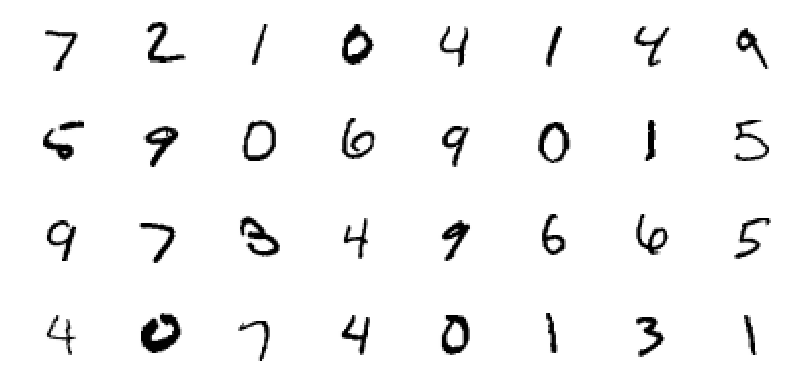

In [13]:
plt.figure(figsize=(8, 4))
n_rows = 4
n_cols = 8

for i in range(n_rows * n_cols):
    plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(test_dataset[i].reshape(28, 28),
               interpolation="none", cmap="gray_r")
    plt.axis("off")
plt.tight_layout()
plt.show()

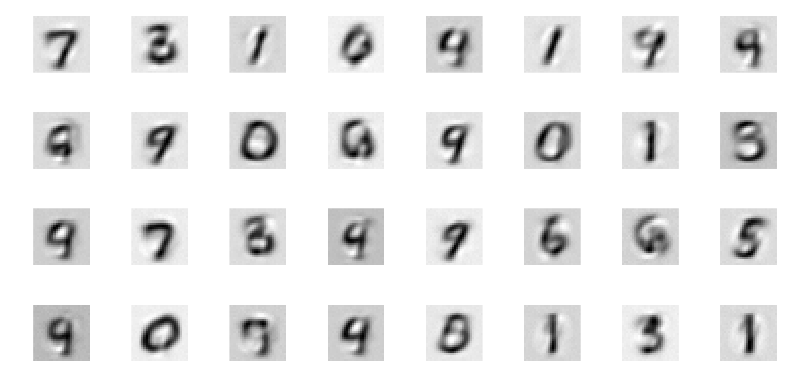

In [12]:
plt.figure(figsize=(8, 4))
n_rows = 4
n_cols = 8

for i in range(n_rows * n_cols):
    plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(reconstruction[i].reshape(28, 28),
               interpolation="none", cmap="gray_r")
    plt.axis("off")
#plt.title('Reconstruction images')
plt.tight_layout()
plt.show()